Import Library

In [460]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Read Data

In [461]:
data = pd.read_csv('german_credit_data.csv', index_col=0)

In [462]:
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [463]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [464]:
data['Saving accounts'].value_counts().to_frame()

,Saving accounts
little,603
moderate,103
quite rich,63
rich,48


In [465]:
data['Purpose'].value_counts().to_frame()

,Purpose
car,337
radio/TV,280
furniture/equipment,181
business,97
education,59
repairs,22
domestic appliances,12
vacation/others,12


Change form data to numberic

In [466]:
def encoding(data):
    for column in ['Saving accounts', 'Checking account']:
        data[column] = data[column].fillna('nan')
    data['Saving accounts'] = data['Saving accounts'].fillna('nan')

    data['Sex'] = data['Sex'].apply(lambda x: 1 if x == 'male' else 0)
    data['Risk'] = data['Risk'].apply(lambda x: 1 if x == 'good' else 0)
    data['Housing'] = data['Housing'].apply(lambda x: 0 if x == 'free' else (1 if x == 'own' else 2))
    data['Saving accounts'] = data['Saving accounts'].apply(lambda x: 0 if x == 'nan' 
                                                                        else(1 if x == 'little' 
                                                                        else(2 if x == 'moderate'
                                                                        else(3 if x == 'quite rich' 
                                                                        else 4))))
                                                                        
    data['Checking account'] = data['Checking account'].apply(lambda x: 0 if x == 'nan' 
                                                                        else(1 if x == 'little' 
                                                                        else(2 if x == 'moderate'
                                                                        else(3 if x == 'quite rich' 
                                                                        else 4))))
    data['Purpose'] = data['Purpose'].apply(lambda x: 5 if x == 'car' 
                                                        else (4 if x == 'radio/TV'
                                                        else (3 if x == 'furniture/equipment'
                                                        else (2 if x == 'business'
                                                        else (1 if x == 'education'
                                                        else 0)))))

In [467]:
encoding(data)

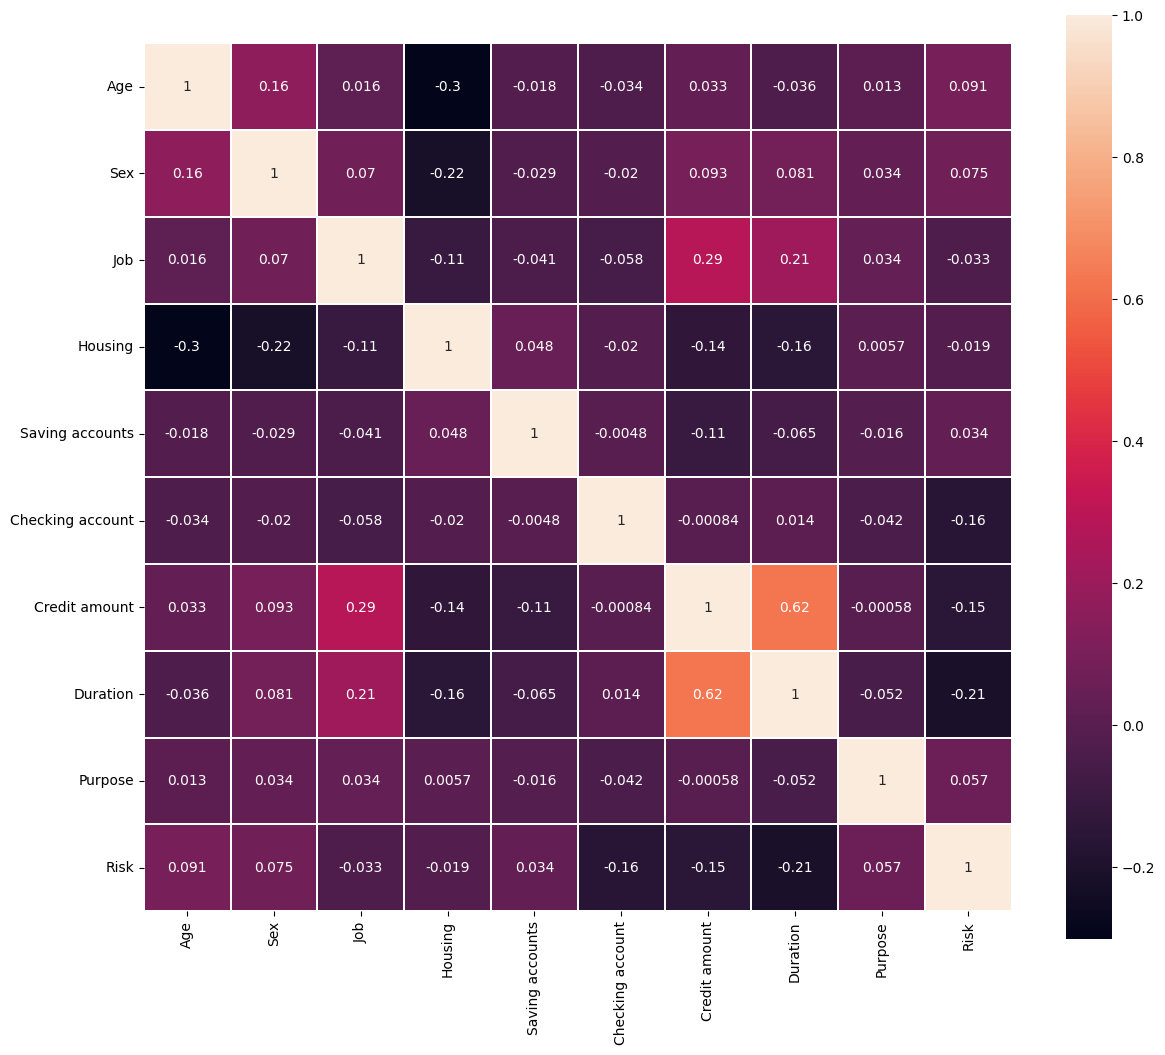

In [468]:
plt.figure(figsize=(14,12))
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [469]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


In [470]:
X

array([[  67,    1,    2, ..., 1169,    6,    4],
       [  22,    0,    2, ..., 5951,   48,    4],
       [  49,    1,    1, ..., 2096,   12,    1],
       ...,
       [  38,    1,    2, ...,  804,   12,    4],
       [  23,    1,    2, ..., 1845,   45,    4],
       [  27,    1,    2, ..., 4576,   45,    5]], dtype=int64)

In [471]:
y

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [472]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [473]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [474]:
from sklearn.preprocessing import StandardScaler, Normalizer
nm = StandardScaler()
X_train = nm.fit_transform(X_train)

In [475]:
X_train

array([[ 2.4061873 ,  0.68205679,  0.10704816, ...,  1.19991221,
         3.29708155, -1.12341523],
       [-0.22436411,  0.68205679,  0.10704816, ..., -0.35962991,
        -0.00805096, -1.82173083],
       [ 1.26628169,  0.68205679,  0.10704816, ..., -0.73354714,
        -1.27925578,  0.97153159],
       ...,
       [-0.7504744 ,  0.68205679,  0.10704816, ...,  0.84360327,
         0.24619   ,  0.97153159],
       [-0.92584449,  0.68205679,  0.10704816, ..., -0.64792251,
        -0.77077385,  0.27321598],
       [-1.01352954, -1.46615357,  0.10704816, ..., -0.83850636,
        -1.27925578,  0.27321598]])

In [476]:
X_test = nm.transform(X_test)

In [477]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5, p = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print ("Accuracy of KNN: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

print("Test predict accuracy score: ", accuracy_score(y_test,y_pred),"\n")

print("Confussion Matrix: \n", confusion_matrix(y_test, y_pred),"\n")

print("Classification report according to Test prediction: \n", classification_report(y_test, y_pred))

print ("Accuracy of KNN: %.2f %%" %(100*accuracy_score(y_test, y_pred)))


Accuracy of KNN: 72.50 %
Test predict accuracy score:  0.725 

Confussion Matrix: 
 [[ 19  40]
 [ 15 126]] 

Classification report according to Test prediction: 
               precision    recall  f1-score   support

           0       0.56      0.32      0.41        59
           1       0.76      0.89      0.82       141

    accuracy                           0.73       200
   macro avg       0.66      0.61      0.61       200
weighted avg       0.70      0.72      0.70       200

Accuracy of KNN: 72.50 %


In [478]:
clf = KNeighborsClassifier(n_neighbors = 5, p = 2, weights = 'distance')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print ("Accuracy of 5NN (distance weights): %.2f %%" %(100*accuracy_score(y_test, y_pred)))

print("Test predict accuracy score: ", accuracy_score(y_test,y_pred),"\n")

print("Confussion Matrix: \n", confusion_matrix(y_test, y_pred),"\n")

print("Classification report according to Test prediction: \n", classification_report(y_test, y_pred))

print ("Accuracy of KNN: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy of 7NN (distance weights): 72.00 %
Test predict accuracy score:  0.72 

Confussion Matrix: 
 [[ 21  38]
 [ 18 123]] 

Classification report according to Test prediction: 
               precision    recall  f1-score   support

           0       0.54      0.36      0.43        59
           1       0.76      0.87      0.81       141

    accuracy                           0.72       200
   macro avg       0.65      0.61      0.62       200
weighted avg       0.70      0.72      0.70       200

Accuracy of KNN: 72.00 %
